# Credit Scoring Mode


=== Logistic Regression ===
              precision    recall  f1-score   support

 Good Credit       0.89      0.72      0.80       140
  Bad Credit       0.55      0.78      0.64        60

    accuracy                           0.74       200
   macro avg       0.72      0.75      0.72       200
weighted avg       0.78      0.74      0.75       200

ROC-AUC Score: 0.807

=== Decision Tree ===
              precision    recall  f1-score   support

 Good Credit       0.79      0.74      0.77       140
  Bad Credit       0.48      0.55      0.51        60

    accuracy                           0.69       200
   macro avg       0.64      0.65      0.64       200
weighted avg       0.70      0.69      0.69       200

ROC-AUC Score: 0.646

=== Random Forest ===
              precision    recall  f1-score   support

 Good Credit       0.77      0.94      0.85       140
  Bad Credit       0.72      0.35      0.47        60

    accuracy                           0.77       200
   macro av

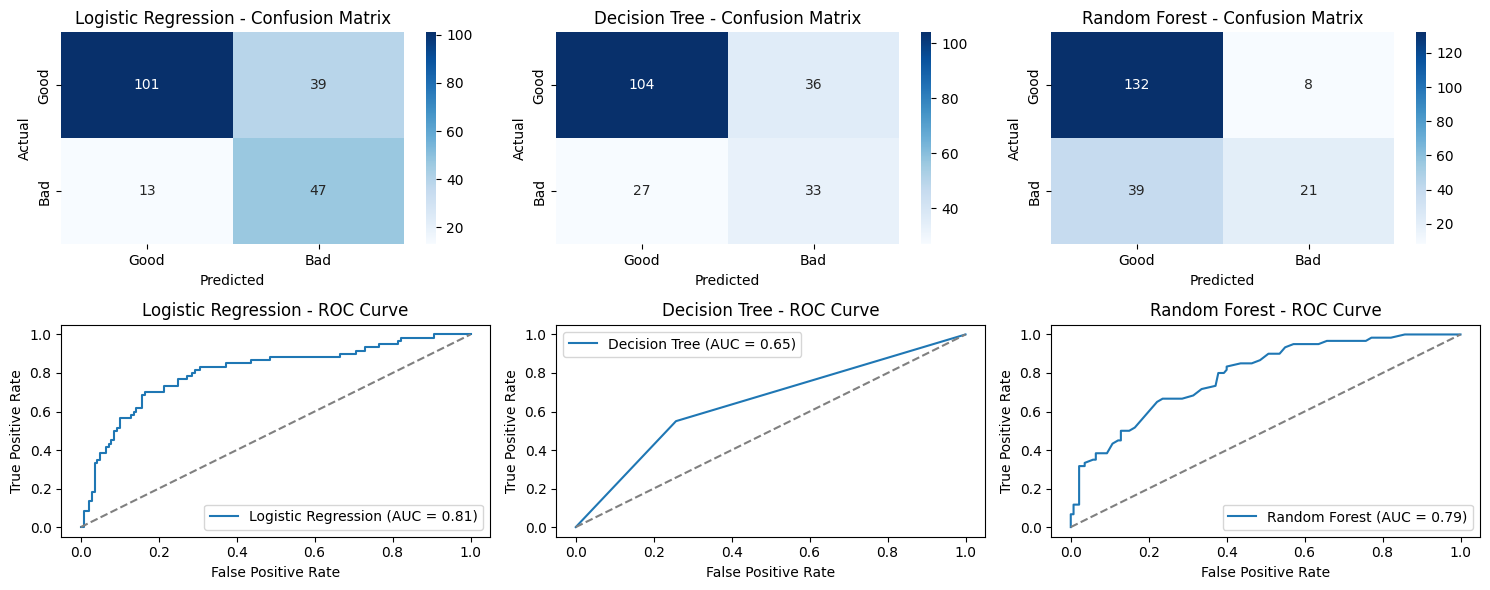

In [ ]:
# Step 1: Install and import required libraries
!pip install -q scikit-learn matplotlib seaborn pandas numpy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve

# Step 2: Load German Credit Data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"
columns = [
    'checking_status','duration','credit_history','purpose','credit_amount',
    'savings','employment_duration','installment_rate','personal_status_sex',
    'other_debtors','residence_since','property','age','other_installment_plans',
    'housing','number_credits','job','people_liable','telephone','foreign_worker','credit_risk'
]
df = pd.read_csv(url, sep=' ', names=columns)

# Step 3: Convert target variable: 1 = good (0), 2 = bad (1)
df['credit_risk'] = df['credit_risk'].map({1: 0, 2: 1})

# Step 4: Identify numeric and categorical columns
num_cols = ['duration', 'credit_amount', 'installment_rate', 'residence_since', 'age', 'number_credits', 'people_liable']
cat_cols = [col for col in df.columns if col not in num_cols + ['credit_risk']]

# Step 5: Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(drop='first'), cat_cols)
])

# Step 6: Split data
X = df.drop('credit_risk', axis=1)
y = df['credit_risk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Step 7: Define classifiers
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
}

# Step 8: Train, Predict and Evaluate with Visualization
plt.figure(figsize=(15, 6))
for i, (name, model) in enumerate(models.items(), 1):
    pipe = Pipeline([
        ('preprocessing', preprocessor),
        ('classifier', model)
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    y_proba = pipe.predict_proba(X_test)[:, 1]

    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred, target_names=['Good Credit', 'Bad Credit']))
    print("ROC-AUC Score:", round(roc_auc_score(y_test, y_proba), 3))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.subplot(2, 3, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Good', 'Bad'], yticklabels=['Good', 'Bad'])
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.subplot(2, 3, i+3)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_proba):.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"{name} - ROC Curve")
    plt.legend()

plt.tight_layout()
plt.show()
